# ResNet Binary Experiment

## Speed limit sign vs. No speed limit sign

In [24]:
import pandas as pd
import numpy as np
import pickle
from matplotlib import pyplot as plt

import tensorflow as tf
#print(tf.__version__)
from tensorflow import keras
from keras.applications import ResNet50
from keras.callbacks import EarlyStopping
from keras.preprocessing import image
from keras.applications.resnet import preprocess_input, decode_predictions
from keras import Input
from keras.layers import Flatten, Dense, Dropout
from keras.models import Sequential, load_model

In [7]:
print("Loading data...")
training_file = './Data/train.p'

sign_names = pd.read_csv("./Data/signname.csv").values[:, 1]

with open(training_file, mode='rb') as f:
    train = pickle.load(f)

Loading data...


0 = speed limit sign; 1 = no speed limit sign

In [8]:
# Incrementing for loop
for i in range(0, len(train['labels']), 1):
    current_label = train['labels'][i]

    # Add if speed limit sign
    if current_label <= 8:
        train['labels'][i] = 0
    else:
        train['labels'][i] = 1

In [9]:
images_train = train['features']
labels_train = train['labels']

In [10]:
def get_data(pickle_filename):
    with open(pickle_filename, mode='rb') as f:
        data = pickle.load(f)


    # Incrementing for loop
    for i in range(0, len(data['labels']), 1):
        current_label = data['labels'][i]

        # Add if speed limit sign
        if current_label <= 8:
            data['labels'][i] = 0
        else:
            data['labels'][i] = 1


    return data['features'], data['labels']

In [11]:
images_valid, labels_valid = get_data('./Data/valid.p')

In [12]:
images_test, labels_test = get_data('./Data/test.p')

## Frozen weights

In [3]:
# Image dimensions and channels
height = 32  # example height
width = 32   # example width
channels = 3  # RGB channels

input_tensor = Input(shape=(height, width, channels))

res_model = ResNet50(weights='imagenet', include_top=False, input_tensor=input_tensor)

# Freeze the pre-trained layers
for layer in res_model.layers:
    layer.trainable = False

In [12]:
model = Sequential()
model.add(res_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [13]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 1, 1, 2048)        23587712  
                                                                 
 flatten_1 (Flatten)         (None, 2048)              0         
                                                                 
 dense_2 (Dense)             (None, 256)               524544    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 257       
                                                                 
Total params: 24,112,513
Trainable params: 524,801
Non-trainable params: 23,587,712
_________________________________________________________________


In [18]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [19]:
epochs = 10
batch_size = 32

history = model.fit(images_train, labels_train, epochs=epochs, batch_size=32, validation_data=(images_valid, labels_valid))

Epoch 1/10
1088/1088 [==============================] - 93s 82ms/step - loss: 0.2317 - accuracy: 0.9127 - val_loss: 0.1625 - val_accuracy: 0.9268
Epoch 2/10
1088/1088 [==============================] - 92s 85ms/step - loss: 0.1319 - accuracy: 0.9473 - val_loss: 0.1816 - val_accuracy: 0.9206
Epoch 3/10
1088/1088 [==============================] - 93s 85ms/step - loss: 0.1107 - accuracy: 0.9570 - val_loss: 0.1540 - val_accuracy: 0.9331
Epoch 4/10
1088/1088 [==============================] - 92s 85ms/step - loss: 0.0895 - accuracy: 0.9644 - val_loss: 0.1502 - val_accuracy: 0.9372
Epoch 5/10
1088/1088 [==============================] - 93s 86ms/step - loss: 0.0806 - accuracy: 0.9677 - val_loss: 0.1536 - val_accuracy: 0.9376
Epoch 6/10
1088/1088 [==============================] - 96s 89ms/step - loss: 0.0726 - accuracy: 0.9723 - val_loss: 0.2107 - val_accuracy: 0.9213
Epoch 7/10
1088/1088 [==============================] - 100s 92ms/step - loss: 0.0694 - accuracy: 0.9724 - val_loss: 0.1685 

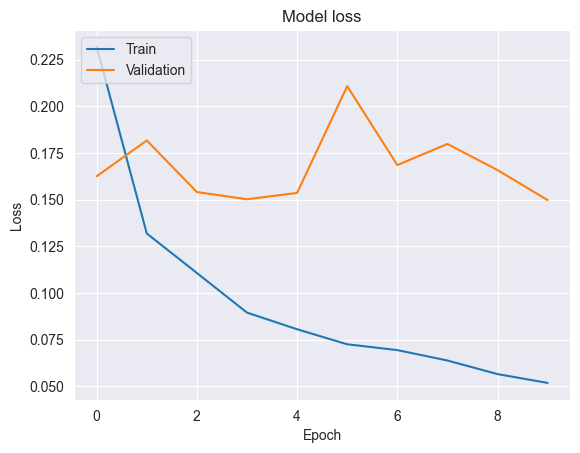

In [20]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

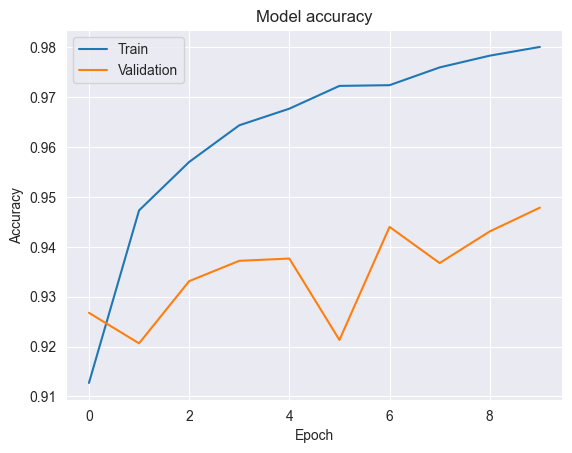

In [21]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [22]:
results = model.evaluate(images_test, labels_test)

print("Test Loss:", results[0])
print("Test Accuracy:", results[1])

395/395 [==============================] - 24s 62ms/step - loss: 0.2466 - accuracy: 0.9430
Test Loss: 0.24664875864982605
Test Accuracy: 0.9429928660392761


In [23]:
model.save('first_binary_custom_resnet_model_frozen_weights.h5')

### Hyperparameters

Experimenting with and fine-tuning hyperparameters

In [9]:
model = Sequential()
model.add(res_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.7))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 1, 1, 2048)        23587712  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 256)               524544    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                8

In [11]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [12]:
epochs = 10
batch_size = 32

history = model.fit(images_train, labels_train, epochs=epochs, batch_size=32, validation_data=(images_valid, labels_valid))

Epoch 1/10
1088/1088 [==============================] - 119s 106ms/step - loss: 0.3619 - accuracy: 0.8452 - val_loss: 0.2170 - val_accuracy: 0.9202
Epoch 2/10
1088/1088 [==============================] - 114s 105ms/step - loss: 0.2247 - accuracy: 0.9022 - val_loss: 0.1802 - val_accuracy: 0.9281
Epoch 3/10
1088/1088 [==============================] - 111s 102ms/step - loss: 0.1908 - accuracy: 0.9207 - val_loss: 0.1561 - val_accuracy: 0.9370
Epoch 4/10
1088/1088 [==============================] - 110s 101ms/step - loss: 0.1717 - accuracy: 0.9266 - val_loss: 0.1636 - val_accuracy: 0.9354
Epoch 5/10
1088/1088 [==============================] - 107s 98ms/step - loss: 0.1555 - accuracy: 0.9351 - val_loss: 0.1532 - val_accuracy: 0.9308
Epoch 6/10
1088/1088 [==============================] - 107s 99ms/step - loss: 0.1443 - accuracy: 0.9394 - val_loss: 0.1601 - val_accuracy: 0.9306
Epoch 7/10
1088/1088 [==============================] - 107s 98ms/step - loss: 0.1352 - accuracy: 0.9420 - val_los

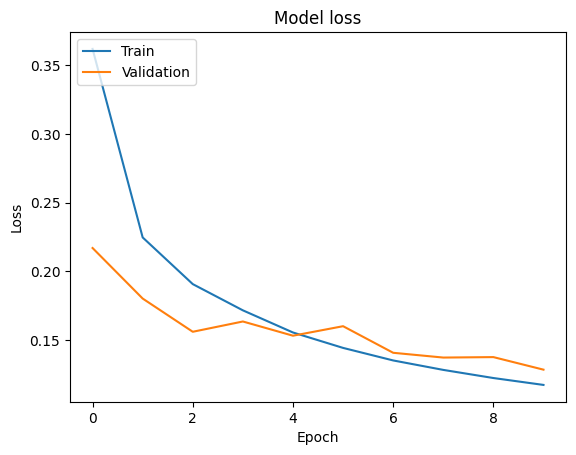

In [13]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

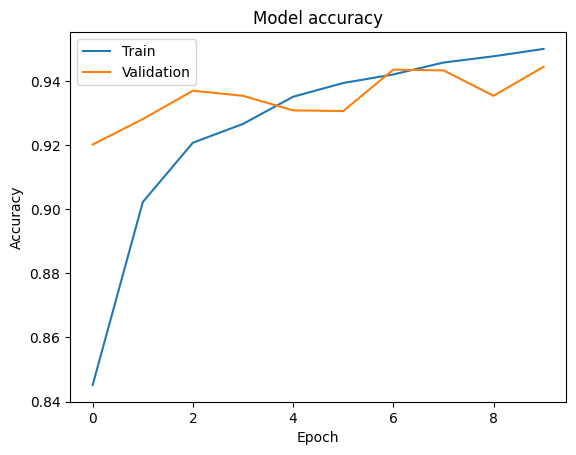

In [14]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [15]:
results = model.evaluate(images_test, labels_test)

print("Test Loss:", results[0])
print("Test Accuracy:", results[1])

395/395 [==============================] - 29s 75ms/step - loss: 0.1799 - accuracy: 0.9360
Test Loss: 0.17993618547916412
Test Accuracy: 0.9360253214836121


In [16]:
model.save('second_binary_custom_resnet_model_frozen_weights.h5')

### Early Stopping

Experimentation with early stopping

In [4]:
model = Sequential()
model.add(res_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.7))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

In [5]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [13]:
epochs = 10
batch_size = 32

# Set up EarlyStopping again (optional, if you want to continue early stopping)
early_stopping = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

history = model.fit(images_train, labels_train, epochs=epochs, batch_size=batch_size, validation_data=(images_valid, labels_valid), callbacks=[early_stopping])

Epoch 1/10
1088/1088 [==============================] - 97s 86ms/step - loss: 0.3647 - accuracy: 0.8479 - val_loss: 0.2176 - val_accuracy: 0.9095
Epoch 2/10
1088/1088 [==============================] - 97s 90ms/step - loss: 0.2322 - accuracy: 0.8986 - val_loss: 0.1778 - val_accuracy: 0.9268
Epoch 3/10
1088/1088 [==============================] - 104s 95ms/step - loss: 0.1924 - accuracy: 0.9175 - val_loss: 0.1693 - val_accuracy: 0.9317
Epoch 4/10
1088/1088 [==============================] - 104s 96ms/step - loss: 0.1688 - accuracy: 0.9288 - val_loss: 0.1642 - val_accuracy: 0.9302
Epoch 5/10
1088/1088 [==============================] - 108s 99ms/step - loss: 0.1532 - accuracy: 0.9365 - val_loss: 0.1545 - val_accuracy: 0.9351
Epoch 6/10
1088/1088 [==============================] - 106s 97ms/step - loss: 0.1421 - accuracy: 0.9411 - val_loss: 0.1565 - val_accuracy: 0.9304
Epoch 7/10
1088/1088 [==============================] - 108s 99ms/step - loss: 0.1311 - accuracy: 0.9452 - val_loss: 0.1

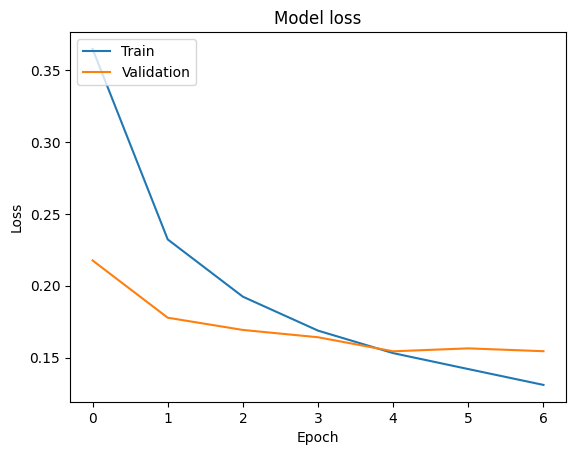

In [14]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

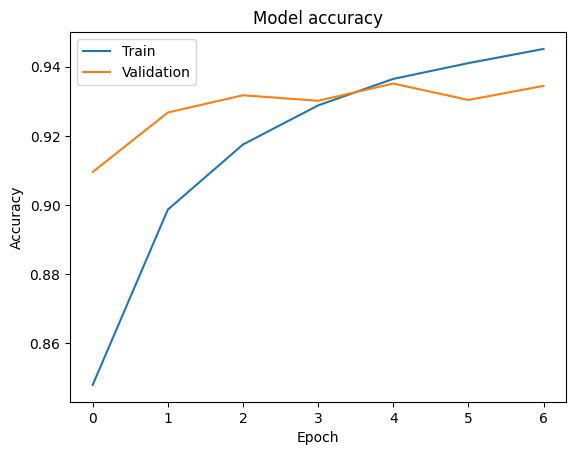

In [15]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [16]:
results = model.evaluate(images_test, labels_test)

print("Test Loss:", results[0])
print("Test Accuracy:", results[1])

395/395 [==============================] - 28s 70ms/step - loss: 0.1843 - accuracy: 0.9258
Test Loss: 0.18428219854831696
Test Accuracy: 0.9258115887641907


In [17]:
model.save('third_binary_custom_resnet_model_frozen_weights_checkpoint_1.h5')

Resume training

In [18]:
# Recompile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [19]:
# Set up EarlyStopping again (optional, if you want to continue early stopping)
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Continue training
history = model.fit(images_train, labels_train, epochs=epochs, batch_size=batch_size, validation_data=(images_valid, labels_valid), callbacks=[early_stopping])

Epoch 1/10
1088/1088 [==============================] - 102s 90ms/step - loss: 0.1492 - accuracy: 0.9400 - val_loss: 0.1484 - val_accuracy: 0.9322
Epoch 2/10
1088/1088 [==============================] - 111s 102ms/step - loss: 0.1337 - accuracy: 0.9446 - val_loss: 0.1600 - val_accuracy: 0.9347
Epoch 3/10
1088/1088 [==============================] - 114s 105ms/step - loss: 0.1240 - accuracy: 0.9483 - val_loss: 0.1356 - val_accuracy: 0.9415
Epoch 4/10
1088/1088 [==============================] - 103s 94ms/step - loss: 0.1187 - accuracy: 0.9516 - val_loss: 0.1423 - val_accuracy: 0.9395
Epoch 5/10
1088/1088 [==============================] - 103s 95ms/step - loss: 0.1147 - accuracy: 0.9532 - val_loss: 0.1595 - val_accuracy: 0.9376
Epoch 6/10
1088/1088 [==============================] - 103s 94ms/step - loss: 0.1080 - accuracy: 0.9558 - val_loss: 0.1382 - val_accuracy: 0.9408


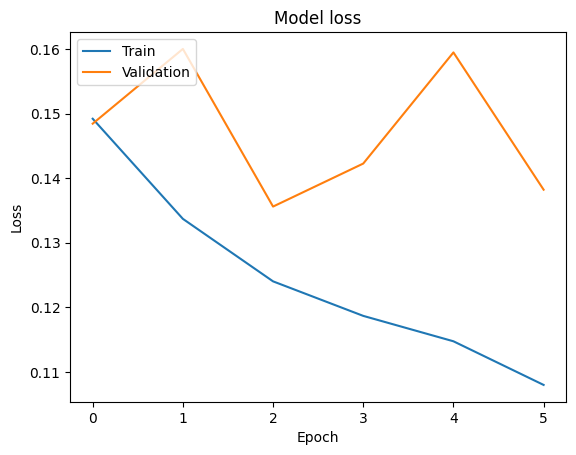

In [20]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

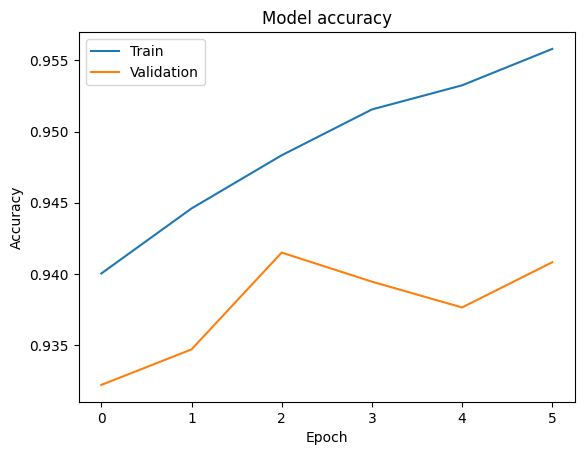

In [21]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [22]:
results = model.evaluate(images_test, labels_test)

print("Test Loss:", results[0])
print("Test Accuracy:", results[1])

395/395 [==============================] - 26s 65ms/step - loss: 0.1922 - accuracy: 0.9318
Test Loss: 0.1922086924314499
Test Accuracy: 0.9318289756774902


In [23]:
model.save('third_binary_custom_resnet_model_frozen_weights_checkpoint_1_resumed_pat_3.h5')

Resume 1st Checkpoint with less patience

In [25]:
model = load_model('third_binary_custom_resnet_model_frozen_weights_checkpoint_1.h5')

In [26]:
# Recompile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Set up EarlyStopping again (optional, if you want to continue early stopping)
early_stopping = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

# Continue training
history = model.fit(images_train, labels_train, epochs=epochs, batch_size=batch_size, validation_data=(images_valid, labels_valid), callbacks=[early_stopping])

## Fine tuning

In [24]:
# Image dimensions and channels
height = 32  # example height
width = 32   # example width
channels = 3  # RGB channels

input_tensor = Input(shape=(height, width, channels))

res_model = ResNet50(weights='imagenet', include_top=False, input_tensor=input_tensor)

In [ ]:
model = Sequential()
model.add(res_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.7))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

Experimentation concludes here due to lack of time.